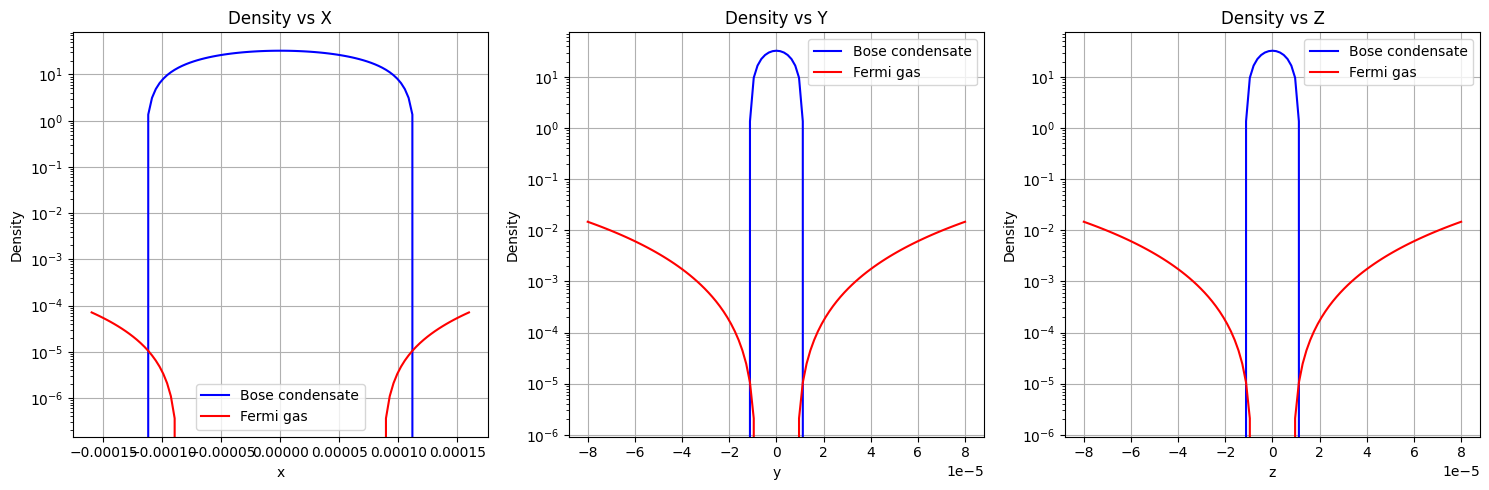

Max Bose density: 3.27e+01
Max Fermi density: 4.32e-02
Total Bose particles: 1.00e+05
Total Fermi particles: 1.00e+04


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
kb = 1.38e-23  # Boltzmann constant
hbar = 1.054e-34  # Reduced Planck's constant
a44 = 7.5e-9   # Helium-4 scattering length
m4 = 6.69843e-27  # Mass of helium-4 (Kg)

# Symmetric trapping frequencies
omega = 2 * np.pi * 600  # Hz (same for x, y, z)
om_x = 2*np.pi* 60
# Interaction strength
g = 4 * np.pi * (hbar**2) * a44 / m4
h = g * 4.5  # Bose-Fermi interaction

# External potential
def V_ext(x, y, z, M):
    return 0.5 * M * omega**2 * ((om_x/omega)**2*x**2 + y**2 + z**2)

# Bose-Einstein condensate density
def n_bose(mu, V_ext, g):
    return np.maximum((mu - V_ext) / g, 0)

# Fermi gas density
def n_fermi(V_ext, h, g, mu, E_F, M):
    V_eff = (1 - h/g) * V_ext + (h/g) * mu
    term = np.maximum(E_F - V_eff, 0)
    return (2 * M / (hbar**2) * term)**(3/2) / (6 * np.pi**2)

# Simulation function
def simulate_distributions(N_points=101, N_B=1e5, N_F=1e4):
    M = m4

    # Symmetric spatial grid
    r_max = 80e-6  # Maximum radius
    x = np.linspace(-2*r_max, 2*r_max, N_points)
    y = np.linspace(-r_max, r_max, N_points)
    z = np.linspace(-r_max, r_max, N_points)
    X, Y, Z = np.meshgrid(x, y, z, indexing='ij')  # Ensure correct indexing

    # Compute external potential
    V = V_ext(X, Y, Z, M)

    # Chemical potential and Fermi energy
    mu = ((M * omega**2 /2)**(3/2) * (15/(8*np.pi)) * N_B * g)**(2/5)
    E_F = hbar * omega * (6 * N_F)**(1/3)

    # Compute densities
    n_B = n_bose(mu, V, g)
    n_F = n_fermi(V, h, g, mu, E_F, M)

    # Normalize densities
    n_B *= N_B / np.sum(n_B)
    n_F *= N_F / np.sum(n_F)

    return x, y, z, n_B, n_F

# Function to plot 1D density distributions
def plot_1D_distributions(x, y, z, n_B, n_F):
    mid = len(x) // 2

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    axes[0].semilogy(x, n_B[:, mid, mid], 'b-', label='Bose condensate')
    axes[0].semilogy(x, n_F[:, mid, mid], 'r-', label='Fermi gas')
    axes[0].set_xlabel('x')
    axes[0].set_ylabel('Density')
    axes[0].set_title('Density vs X')
    axes[0].legend()
    axes[0].grid(True)

    axes[1].semilogy(y, n_B[mid, :, mid], 'b-', label='Bose condensate')
    axes[1].semilogy(y, n_F[mid, :, mid], 'r-', label='Fermi gas')
    axes[1].set_xlabel('y')
    axes[1].set_ylabel('Density')
    axes[1].set_title('Density vs Y')
    axes[1].legend()
    axes[1].grid(True)

    axes[2].semilogy(z, n_B[mid, mid, :], 'b-', label='Bose condensate')
    axes[2].semilogy(z, n_F[mid, mid, :], 'r-', label='Fermi gas')
    axes[2].set_xlabel('z')
    axes[2].set_ylabel('Density')
    axes[2].set_title('Density vs Z')
    axes[2].legend()
    axes[2].grid(True)

    plt.tight_layout()
    plt.show()

# Run simulation
if __name__ == "__main__":
    x, y, z, n_B, n_F = simulate_distributions()

    # Plot 1D density distributions
    plot_1D_distributions(x, y, z, n_B, n_F)

    # Print diagnostics
    print(f"Max Bose density: {np.max(n_B):.2e}")
    print(f"Max Fermi density: {np.max(n_F):.2e}")
    print(f"Total Bose particles: {np.sum(n_B):.2e}")
    print(f"Total Fermi particles: {np.sum(n_F):.2e}")


<ipython-input-8-9baf306c443d>:34: RuntimeWarning: invalid value encountered in power
  return np.where(term > 0, (2 * M / (hbar**2) * term) ** (3/2) / (6 * np.pi**2), 0)


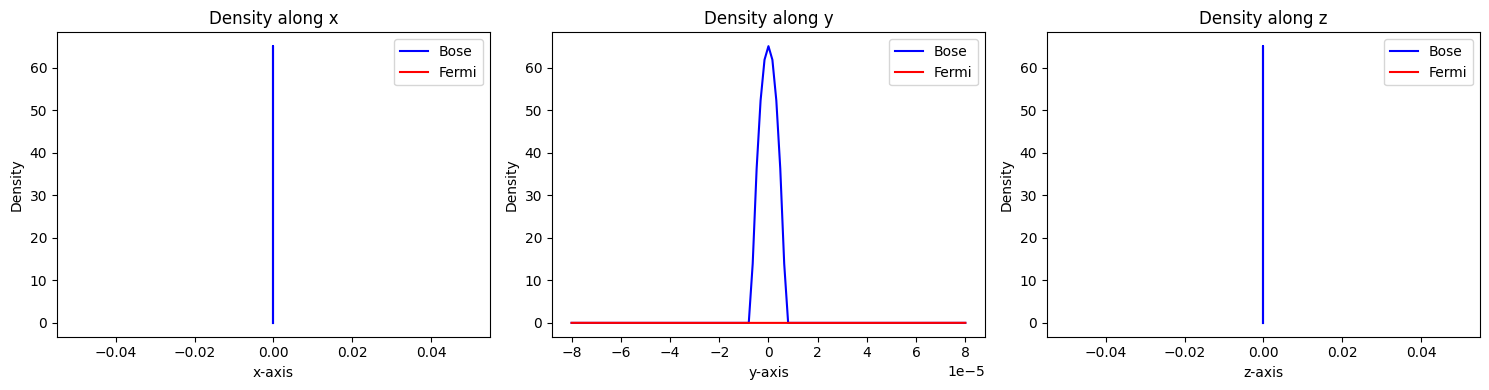

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
kb = 1.38e-23  # Boltzmann constant
hbar = 1.054e-34  # Reduced Planck's constant
a44 = 7.5e-9  # Helium-4 scattering length
m4 = 6.69843e-27  # Mass of helium-4 in kg

# Updated trap frequencies
om_x = 2 * np.pi * 60  # 60 Hz in x-direction
om_y = 2 * np.pi * 600  # 600 Hz in y-direction
om_z = 2 * np.pi * 600  # 600 Hz in z-direction

# Mean trap frequency
omegabar = (om_x * om_y * om_z) ** (1 / 3)

# Interaction strength
g = 4 * np.pi * (hbar**2) * a44 / m4

# External harmonic potential
def V_ext(x, y, z, M):
    return 0.5 * M * ((om_x**2) * x**2 + (om_y**2) * y**2 + (om_z**2) * z**2)

# Bose-Einstein condensate density
def n_bose(V_ext, mu, g):
    n = (mu - V_ext) / g
    return np.where(n > 0, n, 0)

# Fermi gas density
def n_fermi(V_ext, h, g, mu, E_F, M):
    V_eff = (1 - h/g) * V_ext + (h/g) * mu
    term = E_F - V_eff
    return np.where(term > 0, (2 * M / (hbar**2) * term) ** (3/2) / (6 * np.pi**2), 0)

# Simulation function
def simulate_distributions(N_points=101, N_B=1e5, N_F=1e4):
    M = m4
    g = 4 * np.pi * (hbar**2) * a44 / m4
    h = g * 4.5

    # Create spatial grid (same range for all axes)
    r_max = 80e-6
    x = np.linspace(-r_max, r_max, N_points)
    y = np.linspace(-r_max, r_max, N_points)
    z = np.linspace(-r_max, r_max, N_points)
    X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

    # Compute potential
    V = V_ext(X, Y, Z, M)

    # Compute chemical potential and Fermi energy
    mu = ((M * omegabar**2 / 2) ** (3/2) * (15 / (8 * np.pi)) * N_B * g) ** (2/5)
    E_F = hbar * omegabar * (6 * N_F) ** (1/3)

    # Compute densities
    n_B = n_bose(V, mu, g)
    n_F = n_fermi(V, h, g, mu, E_F, M)

    # Normalize densities
    if np.sum(n_B) > 0:
        n_B *= N_B / np.sum(n_B)
    if np.sum(n_F) > 0:
        n_F *= N_F / np.sum(n_F)

    return X, Y, Z, n_B, n_F

# Plot density distributions along x, y, and z axes
def plot_1D_distributions(X, Y, Z, n_B, n_F):
    mid_idx = X.shape[0] // 2  # Middle index

    # Extract density profiles along x, y, and z axes
    n_B_x = n_B[mid_idx, mid_idx, :]
    n_F_x = n_F[mid_idx, mid_idx, :]
    n_B_y = n_B[mid_idx, :, mid_idx]
    n_F_y = n_F[mid_idx, :, mid_idx]
    n_B_z = n_B[:, mid_idx, mid_idx]
    n_F_z = n_F[:, mid_idx, mid_idx]

    x_vals = X[mid_idx, mid_idx, :]
    y_vals = Y[mid_idx, :, mid_idx]
    z_vals = Z[:, mid_idx, mid_idx]

    # Plot results
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))

    axes[0].plot(x_vals, n_B_x, 'b-', label="Bose")
    axes[0].plot(x_vals, n_F_x, 'r-', label="Fermi")
    axes[0].set_xlabel("x-axis")
    axes[0].set_ylabel("Density")
    axes[0].legend()
    axes[0].set_title("Density along x")

    axes[1].plot(y_vals, n_B_y, 'b-', label="Bose")
    axes[1].plot(y_vals, n_F_y, 'r-', label="Fermi")
    axes[1].set_xlabel("y-axis")
    axes[1].set_ylabel("Density")
    axes[1].legend()
    axes[1].set_title("Density along y")

    axes[2].plot(z_vals, n_B_z, 'b-', label="Bose")
    axes[2].plot(z_vals, n_F_z, 'r-', label="Fermi")
    axes[2].set_xlabel("z-axis")
    axes[2].set_ylabel("Density")
    axes[2].legend()
    axes[2].set_title("Density along z")

    plt.tight_layout()
    plt.show()

# Run simulation and generate plots
X, Y, Z, n_B, n_F = simulate_distributions()
plot_1D_distributions(X, Y, Z, n_B, n_F)
